In [1]:
import numpy as np
import pandas as pd
import datetime

import pytest

from Outcomes import outcomes
from SEIR.utils import config



import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import glob, os, sys
from pathlib import Path

#import seaborn as sns
import pyarrow.parquet as pq
import click
import pyarrow as pa

import os

npi_r =  pq.read_table('model_output/snpi/Maryland/inference/2020.08.20.12:11:11.UTC/000000001.2020.08.20.12:11:11.UTC.snpi.parquet').to_pandas()

In [2]:

import SEIR.NPI as snpi

In [3]:
npi_r

,geoid,npi_name,parameter,start_date,end_date,reduction
0,51720,local_variance,r0,"2020-04-15,2020-05-15,2020-05-15","2020-04-20,2020-05-20,2020-05-20",0.495477
1,51017,local_variance,r0,"2020-04-01,2020-05-01","2020-04-15,2020-05-15",0.514003
2,42023,local_variance,r0,"2020-04-15,2020-05-15,2020-05-15","2020-04-20,2020-05-20,2020-05-20",0.503371
3,51720,local_variance2,r0,2020-04-15,2020-05-01,0.000097
4,42023,local_variance2,r0,2020-04-15,2020-05-01,0.000016


In [4]:
npi['start_date']

NameError: name 'npi' is not defined

In [5]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import glob, os, sys
from pathlib import Path
#import seaborn as sns
import matplotlib._color_data as mcd
import pyarrow.parquet as pq
import click

import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from matplotlib.backends.backend_pdf import PdfPages

from SEIR import NPI, setup, file_paths
from SEIR.utils import config
import pathlib

config.set_file('config_test_joseph.yml')
scenario = 'inference'
deathrate = 'med'
spatial_config = config["spatial_setup"]
stoch_traj_flag = True
index = 0
run_id = 0
prefix = 0
spatial_base_path = pathlib.Path(spatial_config["base_path"].get())
scenario = scenario
deathrate = deathrate
stoch_traj_flag= stoch_traj_flag # Truthy: stochastic simulation, Falsy: determnistic mean of the binomial draws
nsim = 10
interactive = False
write_csv = False
write_parquet = True

s = setup.Setup(
    setup_name=config["name"].get() + "_" + str(scenario),
    spatial_setup=setup.SpatialSetup(
        setup_name=spatial_config["setup_name"].get(),
        geodata_file=spatial_base_path / spatial_config["geodata"].get(),
        mobility_file=spatial_base_path / spatial_config["mobility"].get(),
        popnodes_key=spatial_config["popnodes"].get(),
        nodenames_key=spatial_config["nodenames"].get()
    ),
    nsim=nsim,
    npi_scenario=scenario,
    npi_config=config["interventions"]["settings"][scenario],
    seeding_config=config["seeding"],
    ti=config["start_date"].as_date(),
    tf=config["end_date"].as_date(),
    interactive=interactive,
    write_csv=write_csv,
    write_parquet=write_parquet,
    dt=config["dt"].as_number(),
    first_sim_index = index,
    in_run_id = run_id,
    in_prefix = prefix,
    out_run_id = run_id,
    out_prefix = prefix
)

snpi_fn = 'model_output/snpi/Maryland/inference/2020.08.20.12:11:11.UTC/000000001.2020.08.20.12:11:11.UTC.snpi.parquet'

snpi = pq.read_table(snpi_fn).to_pandas()
npi = NPI.NPIBase.execute(
    npi_config=s.npi_config,
    global_config=config,
    geoids=s.spatset.nodenames,
    loaded_df = snpi)
p_draw = setup.parameters_load(snpi_fn.replace('snpi', 'spar')[:-8],
    'parquet',
    len(s.t_inter),
    s.nnodes
)

#npi = NPI.NPIBase.execute(
#    npi_config=s.npi_config,
#    global_config=config,
#    geoids=s.spatset.nodenames,
#    loaded_df = snpi)

parameters = setup.parameters_reduce(p_draw, npi, s.dt)
beta = parameters[1]

In [6]:
npi_r

,geoid,npi_name,parameter,start_date,end_date,reduction
0,51720,local_variance,r0,"2020-04-15,2020-05-15,2020-05-15","2020-04-20,2020-05-20,2020-05-20",0.495477
1,51017,local_variance,r0,"2020-04-01,2020-05-01","2020-04-15,2020-05-15",0.514003
2,42023,local_variance,r0,"2020-04-15,2020-05-15,2020-05-15","2020-04-20,2020-05-20,2020-05-20",0.503371
3,51720,local_variance2,r0,2020-04-15,2020-05-01,0.000097
4,42023,local_variance2,r0,2020-04-15,2020-05-01,0.000016


In [7]:
npi.getReductionToWrite()

,geoid,npi_name,start_date,end_date,parameter,reduction
0,51720,local_variance,"2020-04-15,2020-05-15,2020-05-15","2020-04-20,2020-05-20,2020-05-20",r0,0.495477
1,51017,local_variance,"2020-04-01,2020-05-01","2020-04-15,2020-05-15",r0,0.514003
2,42023,local_variance,"2020-04-15,2020-05-15,2020-05-15","2020-04-20,2020-05-20,2020-05-20",r0,0.503371
3,51720,local_variance2,2020-04-15,2020-05-01,r0,0.000097
4,42023,local_variance2,2020-04-15,2020-05-01,r0,0.000016


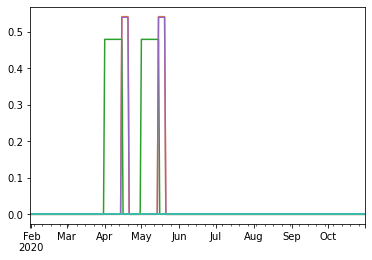

In [24]:
npi.getReduction('r0').T.plot(legend=False);

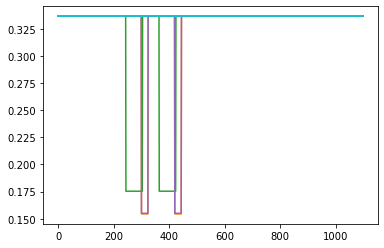

In [25]:
plt.plot(beta);

In [9]:
loaded_df = snpi

In [10]:
loaded_df.index = loaded_df.geoid
loaded_df = loaded_df[loaded_df['npi_name'] == 'local_variance']
parameters = loaded_df[['npi_name','start_date','end_date','parameter','reduction']]#.copy()
parameters

,npi_name,start_date,end_date,parameter,reduction
geoid,,,,,
51720,local_variance,"2020-04-15,2020-05-15,2020-05-15","2020-04-20,2020-05-20,2020-05-20",r0,0.496656
51017,local_variance,"2020-04-01,2020-05-01","2020-04-15,2020-05-15",r0,0.480746
42023,local_variance,"2020-04-15,2020-05-15,2020-05-15","2020-04-20,2020-05-20,2020-05-20",r0,0.509052


In [11]:
loaded_df

,geoid,npi_name,parameter,start_date,end_date,reduction
geoid,,,,,,
51720,51720,local_variance,r0,"2020-04-15,2020-05-15,2020-05-15","2020-04-20,2020-05-20,2020-05-20",0.496656
51017,51017,local_variance,r0,"2020-04-01,2020-05-01","2020-04-15,2020-05-15",0.480746
42023,42023,local_variance,r0,"2020-04-15,2020-05-15,2020-05-15","2020-04-20,2020-05-20,2020-05-20",0.509052


In [12]:
parameters["start_date"] = [[datetime.date.fromisoformat(date) for date in strdate.split(",")] for strdate in parameters["start_date"]]
parameters

/Users/chadi/opt/miniconda3/envs/covidSP/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,npi_name,start_date,end_date,parameter,reduction
geoid,,,,,
51720,local_variance,"[2020-04-15, 2020-05-15, 2020-05-15]","2020-04-20,2020-05-20,2020-05-20",r0,0.496656
51017,local_variance,"[2020-04-01, 2020-05-01]","2020-04-15,2020-05-15",r0,0.480746
42023,local_variance,"[2020-04-15, 2020-05-15, 2020-05-15]","2020-04-20,2020-05-20,2020-05-20",r0,0.509052


In [13]:
        print(self.parameters["start_date"])        self.parameters["end_date"] = [datetime.date.fromisoformat(date) for date in self.parameters["end_date"]]
        self.affected_geoids = set(self.parameters.index)
        self.param_name = self.parameters["parameter"].unique()

SyntaxError: invalid syntax (<ipython-input-13-dc1faf74dbe9>, line 1)

In [ ]:
[datetime.date(2000,1,1),datetime.date(2000,2,1), datetime.date(2000,1,1),datetime.date(2000,2,1)].astype("str")

In [ ]:
b = set([1,2,4])

In [ ]:
type(b)

In [ ]:
len(b)